In [1]:
import numpy as np
import segyio
import os
import matplotlib.pyplot as plt
from scipy import io
from segysak.segy import get_segy_texthead

data_file = r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy"

In [9]:

def segment_segy_into_shots(sgyfile):
    """
    This function reads a SEG-Y file and segments it into individual shots.
    
    Args:
    sgyfile (str): Path to the SEG-Y file
    
    Returns:
    tuple: Containing segmented data, samples, text header, and number of shots
    """
    segmented_data = []
    samples = None
    text_header = None

    with segyio.open(sgyfile, "r", ignore_geometry=True) as f:
        num_traces = f.tracecount
        num_samples = f.samples.size
        print(num_samples,num_samples)

        # Initialize data array
        dataout = np.zeros((num_traces, num_samples))

        # Populate the data array with traces
        for i in range(num_traces):
            dataout[i, :] = f.trace[i]

        # Extracting sample interval
        sampint = f.samples[1] - f.samples[0]

        samples = f.samples
        text_header = segyio.tools.wrap(f.text[0])

        # Segment the data into shots
        num_shots = determine_number_of_shots(num_traces)
        traces_per_shot = num_traces // num_shots
        segmented_data = [dataout[i * traces_per_shot:(i + 1) * traces_per_shot, :] for i in range(num_shots)]

    return dataout, sampint,segmented_data, samples, text_header, num_shots





def determine_number_of_shots(num_traces):
    """
    This function calculates the number of shots based on the total number of traces.
    
    Args:
    num_traces (int): Total number of traces in the SEG-Y file
    
    Returns:
    int: Number of shots
    """
    # Each shot contains 5105 traces
    traces_per_shot = 5105
    num_shots = num_traces // traces_per_shot

    # Handle leftover traces
    if num_traces % traces_per_shot > 0:
        num_shots += 1

    return num_shots

In [10]:
# Example usage
# data_file = r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy"  # Replace with actual SEG-Y file path
dataout, sampint,segmented_data, samples, text_header, num_shots = segment_segy_into_shots(data_file)

# Accessing the data
print(f"Number of Shots: {num_shots}")
print(f"Shape of First Shot Data: {segmented_data[0].shape}")  # Data shape of first shot


3200 3200
Number of Shots: 3
Shape of First Shot Data: (5105, 3200)


In [11]:
def plot_specific_trace(segment_data, shot_index, trace_index):
    """
    This function plots a specific trace from a specified shot in the segmented seismic data.

    Args:
    segment_data (list): List of numpy arrays, each representing a shot
    shot_index (int): Index of the shot to plot from (0-based)
    trace_index (int): Index of the trace within the shot to plot (0-based)

    Returns:
    None: Displays the plot
    """
    # Create a new figure with specified size
    plt.figure(figsize=(10, 4))

    # Plot the specified trace from the selected shot
    plt.plot(segment_data[shot_index][trace_index])

    # Set the title of the plot (adding 1 to indices for user-friendly numbering)
    plt.title(f'Trace {trace_index + 1} of Shot {shot_index + 1}')

    # Label the x-axis
    plt.xlabel('Sample Number')

    # Label the y-axis
    plt.ylabel('Amplitude')

    # Add a grid to the plot for better readability
    plt.grid()

    # Display the plot
    plt.show()

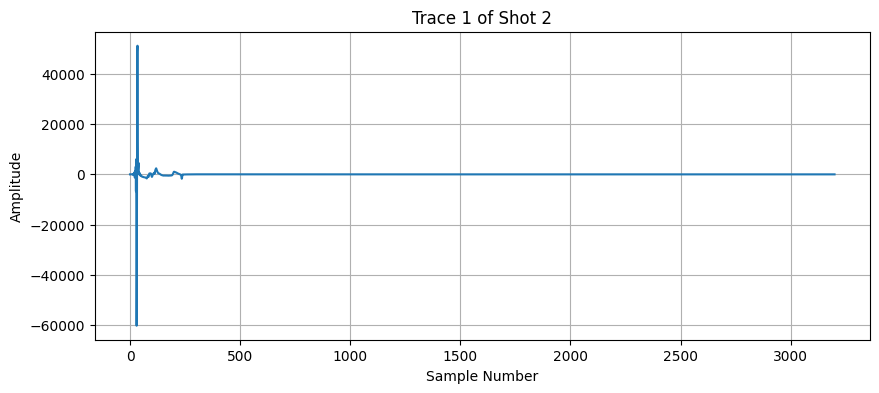

In [45]:
# Plot selected trace 
shot_index = 1  # Second shot
trace_index = 0  # 100th trace 

plot_specific_trace(segmented_data, shot_index, trace_index)

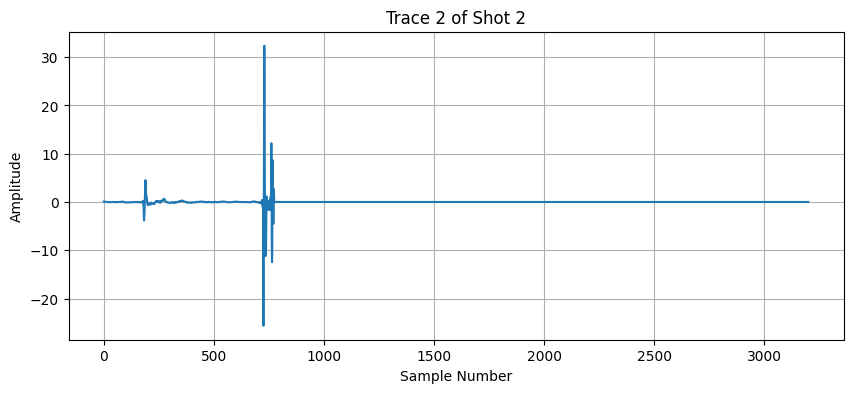

In [46]:
# Plot selected trace 
shot_index = 1  # Second shot
trace_index = 1  # 100th trace 

plot_specific_trace(segmented_data, shot_index, trace_index)

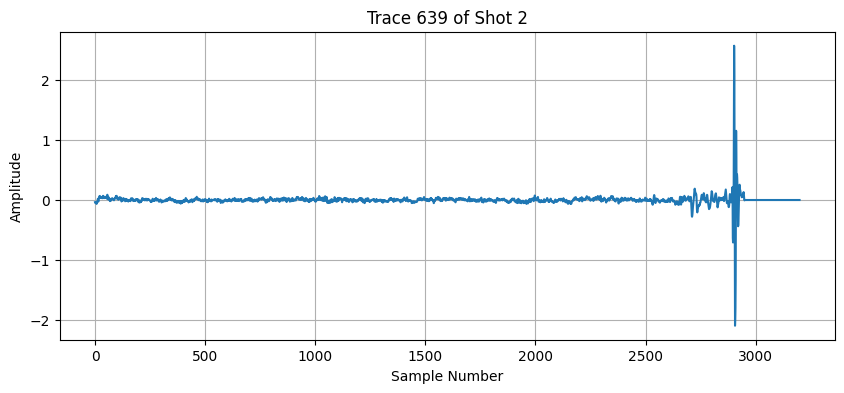

In [49]:
# Plot selected trace 
shot_index = 1  # Second shot
trace_index = 638  # 100th trace 

plot_specific_trace(segmented_data, shot_index, trace_index)

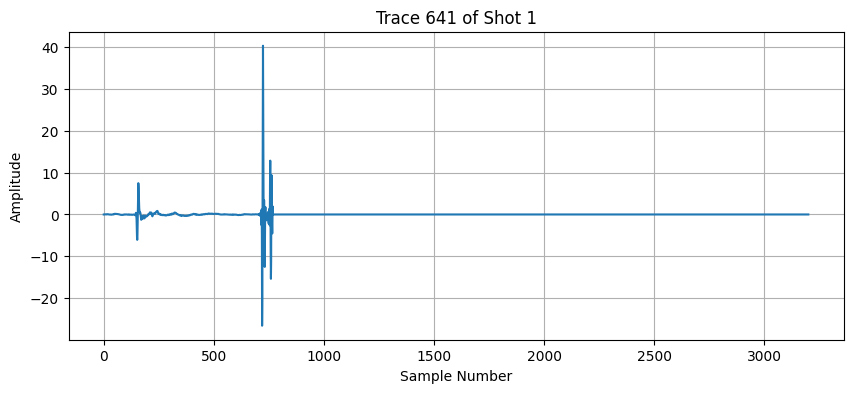

In [22]:
# Plot selected trace 
shot_index = 0  # Second shot
trace_index = 1276
  # 100th trace 

plot_specific_trace(segmented_data, shot_index, trace_index)

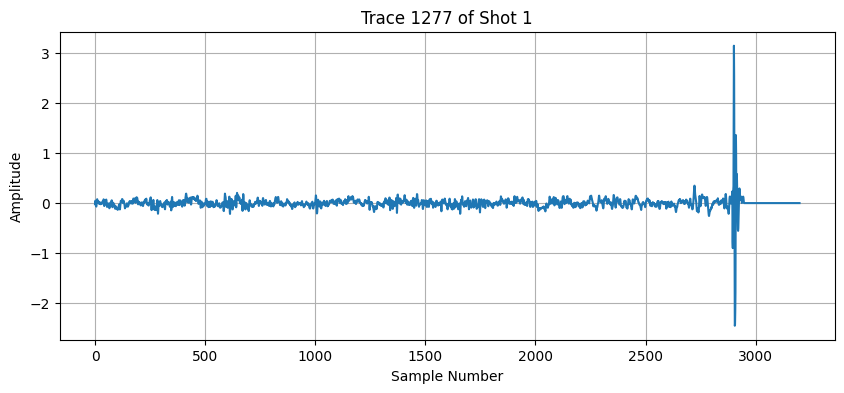

In [28]:
# Plot selected trace 
shot_index = 0  # Second shot
trace_index = 1276
  # 100th trace 

plot_specific_trace(segmented_data, shot_index, trace_index)

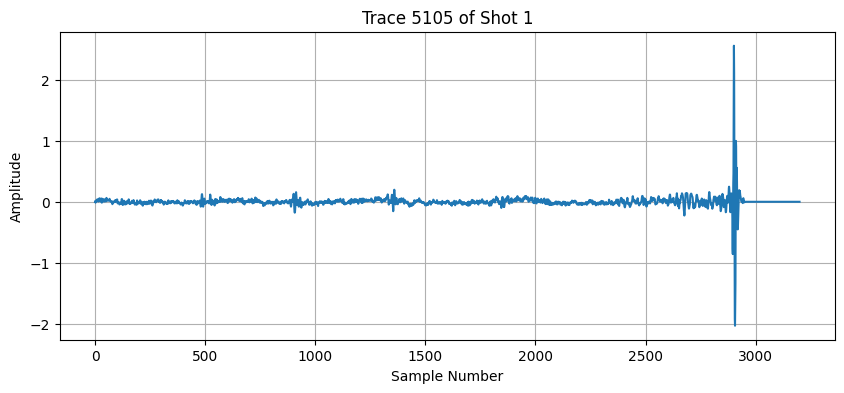

In [44]:
# Plot selected trace 
shot_index = 0  # Second shot
trace_index = 5104
  # 100th trace 

plot_specific_trace(segmented_data, shot_index, trace_index)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot time vs receiver number for a specific shot
def plot_shot(dataout, sampint, shot_index):
    num_traces = dataout.shape[0]
    num_samples = dataout.shape[1]

    # Create a time vector based on the sample interval
    time_vector = np.arange(0, num_samples * sampint, sampint)

    # Calculate the number of traces per shot
    traces_per_shot = num_traces // 5105  # Assuming each shot contains 5105 traces
    
    # Determine the start and end index for the specified shot
    start_index = shot_index * traces_per_shot
    end_index = (shot_index + 1) * traces_per_shot

    # Create receiver numbers for this shot
    receiver_numbers = np.arange(start_index, end_index)

    # Create a figure for the plot
    plt.figure(figsize=(12, 8))

    # Plot the traces for the specified shot
    for i in range(start_index, end_index):
        plt.plot(time_vector, dataout[i, :], color='blue', alpha=0.6)

    # Labeling the plot
    plt.title(f'Time vs Receiver Number for Shot {shot_index + 1}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()



In [15]:
def plot_shot(dataout, sampint, shot_index):
    """
    Plots the amplitude versus time for a specific shot.
    
    Args:
    dataout (numpy.ndarray): The output data of traces
    sampint (float): Sample interval
    shot_index (int): Index of the shot to plot
    """
    num_traces = dataout.shape[0]
    num_samples = dataout.shape[1]

    # Create a time vector based on the sample interval
    time_vector = np.arange(0, num_samples * sampint, sampint)

    # Calculate the number of traces per shot
    traces_per_shot = num_traces // 5105  # Assuming each shot contains 5105 traces
    
    # Determine the start and end index for the specified shot
    start_index = shot_index * traces_per_shot
    end_index = (shot_index + 1) * traces_per_shot

    # Create a figure for the plot
    plt.figure(figsize=(12, 8))

    # Plot the traces for the specified shot
    for i in range(start_index, end_index):
        plt.plot(time_vector, dataout[i, :], color='blue', alpha=0.6)

    # Labeling the plot
    plt.title(f'Time vs Receiver Number for Shot {shot_index + 1}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

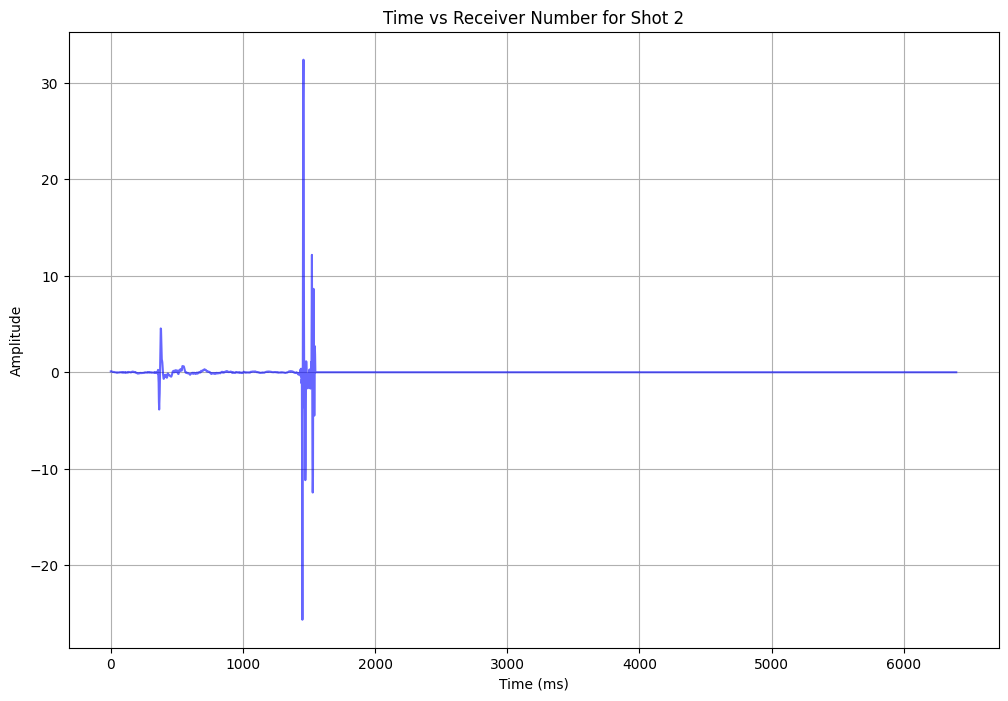

In [17]:
shot_index = 1  # Specify which shot to plot (0 for first shot, 1 for second, etc.)

# Access the specific shot from segmented_data
specific_shot_data = segmented_data[shot_index]

# Plot the specific shot
plot_shot(specific_shot_data, sampint, shot_index)